In [2]:
import numpy as np

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras import optimizers 
import matplotlib.pyplot as plt
#=-0.2*(A1^3)-3.6*(A1^2)-4.9*A1

In [5]:
data = np.loadtxt("R_data.csv", delimiter=",", dtype=np.int32) 
x_train = data[:, 0:3]
y_train = data[:, 5] 
y_train[y_train == -127] = -1

# 0을 0으로 바꾸기
y_train[y_train == 0] = 0

# 127을 1로 바꾸기
y_train[y_train == 127] = 1
print(y_train[0:100])

[ 0  0  0  0 -1 -1 -1 -1  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  0
  0  0  0  0  0  1  1  1  1  1  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0  0  0  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0 -1
 -1 -1 -1 -1]


In [39]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(1000, activation='relu'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(500, activation='relu'))
model.add(Dense(300,activation='tanh'))
model.add(Dense(100, activation='relu'))

model.add(Dense(1))

In [40]:
sgd=optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=sgd, loss='mean_squared_error') 
model.summary()
history = model.fit(x_train, y_train, epochs=5000, batch_size=256) 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 100)               400       
                                                                 
 dense_52 (Dense)            (None, 1000)              101000    
                                                                 
 dense_53 (Dense)            (None, 200)               200200    
                                                                 
 dense_54 (Dense)            (None, 500)               100500    
                                                                 
 dense_55 (Dense)            (None, 300)               150300    
                                                                 
 dense_56 (Dense)            (None, 100)               30100     
                                                                 
 dense_57 (Dense)            (None, 1)                

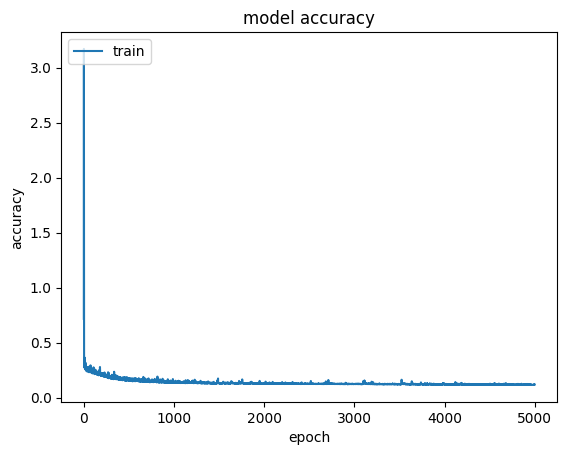

In [41]:

plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

14/14 [==============================] - 0s 5ms/step


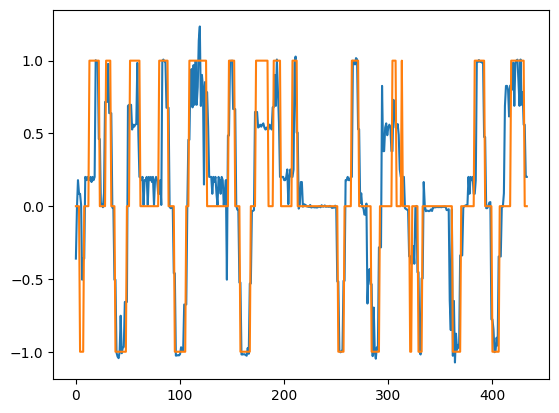

In [42]:
y_predict = model.predict(x_train) 
plt.plot(y_predict)
plt.plot(y_train)
#print(y_predict)
#print(model.predict(np.array([[1.2]])))

In [43]:
model.save("S_data.h5")